<a href="https://colab.research.google.com/github/teooi/banana-brain-project/blob/main/leolabo_brain_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies
!pip install bids
!pip install nibabel
!pip install openneuro-py
!pip install nilearn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=6c248ac15ae6e9bb52a17a5ec8c08f0a31d56157f533e053eacf5662cc9a4e54
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

- switch data to perception
- create data structure for one run
label: {
  rh_ffa: {
    voxel_01: {time_series_data}
  }
}
- do this 10 times for one subject
- do this 5 time for each subject
- do this for percetion testing + training (we will split the training, validating, and testing datasets later down the line)


* figure out wtf the paper does to the time series data



In [ ]:
# Downloading all the fMRI data
import openneuro as on
!openneuro-py download --dataset=ds001246 --target-dir=data/bids --include=sub-01

# Brain masks data
!openneuro-py download --dataset=ds001246 --target-dir=data/bids --include=sourcedata/sub-01

Streaming output truncated to the last 5000 lines.


sub-01_ses-perceptionTest03_task-perception_run-03_bold.nii.gz: 3.84MB [00:01, 5.01MB/s]

sub-01_ses-perceptionTest03_task-perception_run-02_bold.nii.gz: 40.7MB [00:05, 7.35MB/s]



sub-01_ses-perceptionTest03_task-perception_run-05_bold.nii.gz: 755kB [00:00, 1.10MB/s]
sub-01_ses-perceptionTest03_task-perception_run-04_bold.nii.gz: 949kB [00:01, 1.10MB/s]


sub-01_ses-perceptionTest03_task-perception_run-03_bold.nii.gz: 4.68MB [00:01, 6.07MB/s]

sub-01_ses-perceptionTest03_task-perception_run-02_bold.nii.gz: 41.7MB [00:06, 8.06MB/s]



sub-01_ses-perceptionTest04_task-perception_run-03_events.tsv: 0.00B [00:00, ?B/s]
                                                                                  


sub-01_ses-perceptionTest03_task-perception_run-03_bold.nii.gz: 5.44MB [00:02, 5.99MB/s]

sub-01_ses-perceptionTest03_task-perception_run-02_bold.nii.gz: 42.5MB [00:06, 7.26MB/s]
sub-01_ses-perceptionTest03_task-perception_run-04_bold.ni

In [ ]:
# Imports downloaded data into BIDS format, easily handled by nilearn
from bids import BIDSLayout, BIDSValidator
import os
import numpy as np

data_dir = "/content/data/bids"

layout = BIDSLayout(data_dir, derivatives=True, validate=False)
layout

/usr/local/lib/python3.10/dist-packages/bids/layout/layout.py:516: UserWarning: Derivative indexing was requested, but no valid datasets were found in the specified locations ([PosixUPath('/content/data/bids/derivatives')]). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a 'dataset_description.json' file in derivatives datasets).
Example contents of 'dataset_description.json':
{"Name": "Example dataset", "BIDSVersion": "1.0.2", "GeneratedBy": [{"Name": "Example pipeline"}]}
  warnings.warn("Derivative indexing was requested, but no valid "


BIDS Layout: .../content/data/bids | Subjects: 1 | Sessions: 11 | Runs: 10

In [ ]:
layout.to_df()

entity,path,datatype,extension,run,session,subject,suffix,task
0,/content/data/bids/dataset_description.json,NaN,.json,NaN,NaN,NaN,description,NaN
1,/content/data/bids/sub-01/ses-anatomy/anat/sub...,anat,.nii.gz,NaN,anatomy,01,T1w,NaN
2,/content/data/bids/sub-01/ses-imageryTest01/an...,anat,.nii.gz,NaN,imageryTest01,01,inplaneT2,NaN
3,/content/data/bids/sub-01/ses-imageryTest01/fu...,func,.nii.gz,01,imageryTest01,01,bold,imagery
4,/content/data/bids/sub-01/ses-imageryTest01/fu...,func,.tsv,01,imageryTest01,01,events,imagery
...,...,...,...,...,...,...,...,...
167,/content/data/bids/sub-01/ses-perceptionTraini...,func,.tsv,03,perceptionTraining03,01,events,perception
168,/content/data/bids/sub-01/ses-perceptionTraini...,func,.nii.gz,04,perceptionTraining03,01,bold,perception
169,/content/data/bids/sub-01/ses-perceptionTraini...,func,.tsv,04,perceptionTraining03,01,events,perception
170,/content/data/bids/CHANGES,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Getting data from BIDS dataframe
import nibabel as nib
import os.path

t1_files = layout.get(subject="01", datatype="anat",session="anatomy", return_type="file", extension=".nii.gz")
t1_img = nib.load(t1_files[0])

bold_img_files = layout.get(subject="01", datatype="func", session="imageryTest01", return_type="file", extension=".nii.gz")
bold_img = nib.load(bold_img_files[0])

bold_img_labels = layout.get(subject="01", datatype="func", session="imageryTest01", return_type="file", extension=".tsv", run="01")

In [ ]:
# Importing brain plotting tools
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi, plot_img

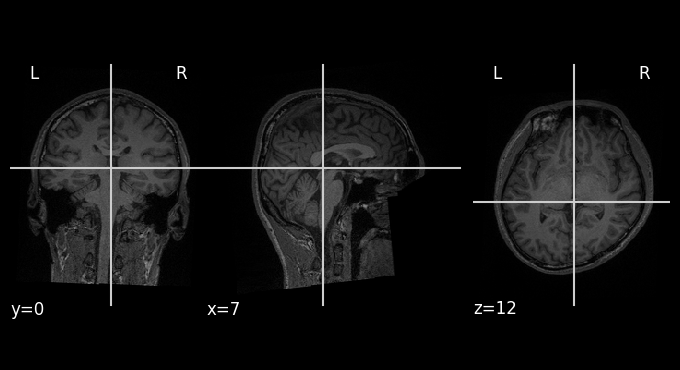

In [ ]:
plot_anat(t1_img)

In [ ]:
print(bold_img.shape)
print(t1_img.shape)

(64, 64, 50, 213)
(256, 256, 192)


(64, 64, 50)


/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


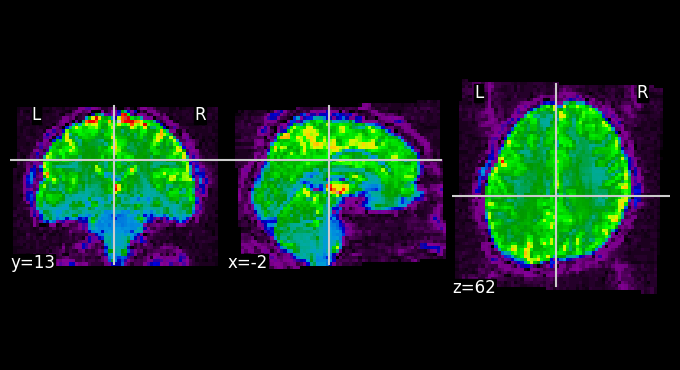

In [ ]:
func_vol = bold_img.slicer[:,:,:,0]
print(func_vol.shape)
plot_epi(func_vol)

In [ ]:
# Getting brainmask data
data_dir = "/content/data/bids/sourcedata/"
layout = BIDSLayout(data_dir, derivatives=True, validate=False)
layout.to_df()

/usr/local/lib/python3.10/dist-packages/bids/layout/layout.py:516: UserWarning: Derivative indexing was requested, but no valid datasets were found in the specified locations ([PosixUPath('/content/data/bids/sourcedata/derivatives')]). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a 'dataset_description.json' file in derivatives datasets).
Example contents of 'dataset_description.json':
{"Name": "Example dataset", "BIDSVersion": "1.0.2", "GeneratedBy": [{"Name": "Example pipeline"}]}
  warnings.warn("Derivative indexing was requested, but no valid "


entity,path,datatype,extension,subject,suffix
0,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,FFA
1,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,HVC
2,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,LOC
3,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,PPA
4,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,V1d
5,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,V1v
6,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,V2d
7,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,V2v
8,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,V3d
9,/content/data/bids/sourcedata/sub-01/anat/sub-...,anat,.nii.gz,01,V3v


In [ ]:
# Assign Right and Left hemisphere to data labels
masker_labels = layout.to_df().loc[:,"suffix"].tolist()
midpoint = len(masker_labels) // 2
first_half = [ "RH_" + str(item) for item in masker_labels[:midpoint]]
second_half = ["LH_" + str(item) for item in masker_labels[midpoint:]]
masker_labels = first_half + second_half # List of all the brain regions
print("num of labels: " + str(len(masker_labels)))

num of labels: 22


In [ ]:
sub01_brainmasks = layout.get(subject="01", datatype="anat",return_type="file", extension=".nii.gz")
sub01_FFA = nib.load(sub01_brainmasks[0])
all_brainmasks = []
for i in range (len(sub01_brainmasks)):
  # print(sub01_brainmasks[i])
  all_brainmasks.append(nib.load(sub01_brainmasks[i]))
#create dict with image and label

In [ ]:
sub01_brainmasks_dict = {}
for i in range(len(all_brainmasks)):
  sub01_brainmasks_dict[masker_labels[i]] = all_brainmasks[i]
# sub01_brainmasks_dict # Dict of all the labels and Niimg"s of the brainmasks

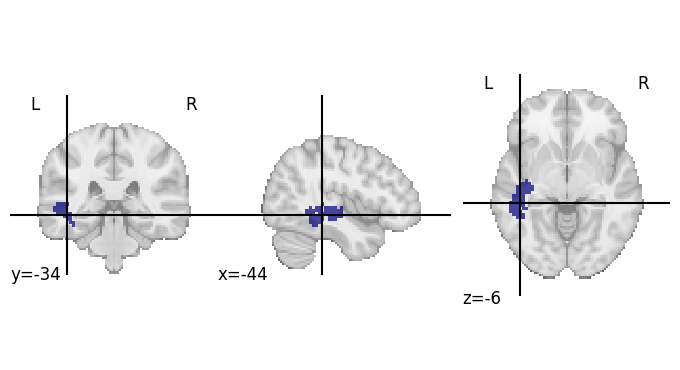

In [ ]:
from nilearn.plotting import plot_roi
plot_roi(sub01_brainmasks_dict.get("RH_FFA"))

/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)


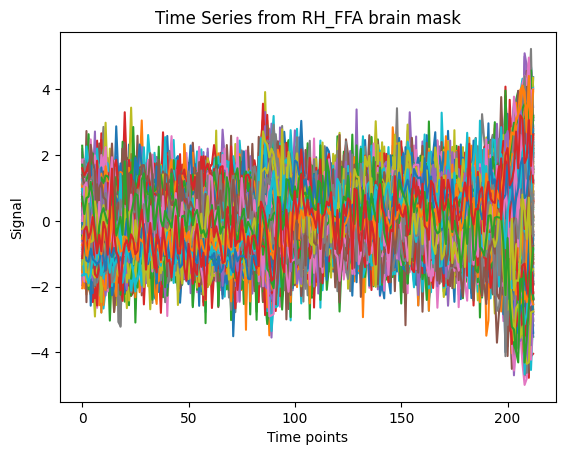

In [ ]:
from nilearn import datasets, image
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import numpy as np

mask_img = sub01_brainmasks_dict.get("RH_FFA")
masker = NiftiMasker(mask_img=mask_img, standardize=True)

time_series = masker.fit_transform(bold_img)

plt.plot(time_series)
plt.title("Time Series from RH_FFA brain mask")
plt.xlabel("Time points")
plt.ylabel("Signal")
plt.show()

In [ ]:
time_series.shape

(213, 294)

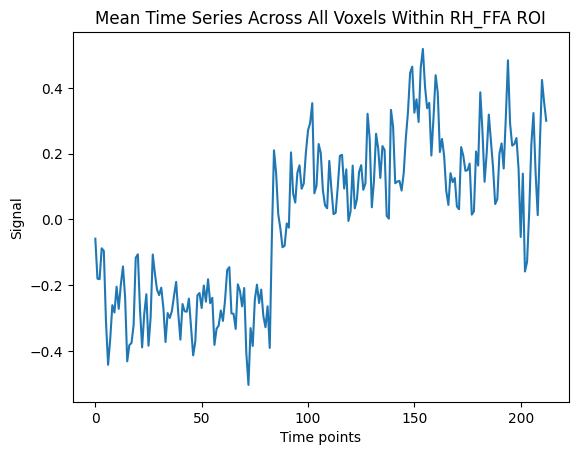

In [ ]:
mean_time_series = time_series.mean(axis=1)
plt.plot(mean_time_series)
plt.title("Mean Time Series Across All Voxels Within RH_FFA ROI")
plt.xlabel("Time points")
plt.ylabel("Signal")
plt.show()

In [ ]:
mean_time_series_all = []
for roi_name, mask_img in sub01_brainmasks_dict.items():
  masker = NiftiMasker(mask_img=mask_img, standardize=True)
  time_series = masker.fit_transform(bold_img)
  mean_time_series = time_series.mean(axis=1)
  mean_time_series_all.append(mean_time_series)

mean_time_series_array = np.array(mean_time_series_all)
print(mean_time_series_array.shape) # Prints the shape of the array with all the mean time series

/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)
/usr/local/lib/pyt

(22, 213)


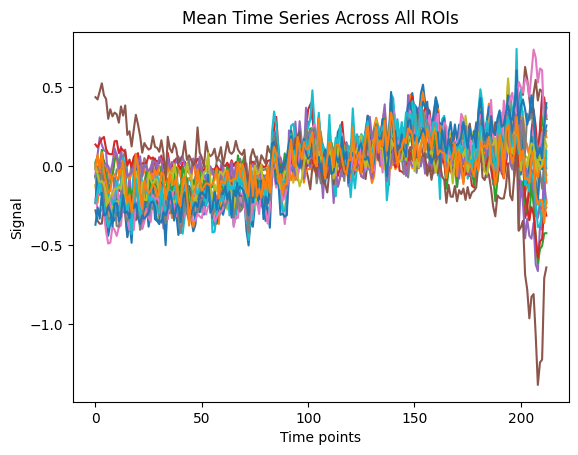

In [ ]:
# Plot all mean time series
for i in range(mean_time_series_array.shape[0]):
  plt.plot(mean_time_series_array[i,:])

# Add labels and title
plt.xlabel("Time points")
plt.ylabel("Signal")
plt.title("Mean Time Series Across All ROIs")

# Display plot
plt.show()

In [ ]:
# Get the labels
bold_img_labels

['/content/data/bids/sub-01/ses-imageryTest01/func/sub-01_ses-imageryTest01_task-imagery_run-01_events.tsv']

In [ ]:
import pandas as pd
df = pd.read_csv(bold_img_labels[0], sep="\t")

In [ ]:
df.head()

,onset,duration,trial_no,event_type,category_id,category_name,category_index,response_time,evaluation
0,0,33,1,rest,NaN,NaN,NaN,NaN,NaN
1,33,3,2,cue,2690373.0,n02690373,16.0,52.728104,5.0
2,36,15,2,imagery,2690373.0,n02690373,16.0,52.728104,5.0
3,51,3,2,evaluation,2690373.0,n02690373,16.0,52.728104,5.0
4,54,3,2,inter_rest,2690373.0,n02690373,16.0,52.728104,5.0


In [ ]:
!pip install nltk

In [ ]:
# Get category names from wordnet ID
import nltk
from nltk.corpus import wordnet as wn
nltk.download("wordnet")

label_id_str = df["category_name"][1]
label_id = int(label_id_str[1:])

labels = []

for i in range(df.shape[0]):
  label_id_str = df["category_name"][i]
  if isinstance(label_id_str, str):
    label_id = int(label_id_str[1:])
    labels.append(wn.synset_from_pos_and_offset("n", label_id))
labels.insert(0,"NaN")
labels.append("NaN")
len(labels)

[nltk_data] Downloading package wordnet to /root/nltk_data...


102

In [ ]:
df = df.assign(labels=labels)
df

,onset,duration,trial_no,event_type,category_id,category_name,category_index,response_time,evaluation,labels
0,0,33,1,rest,NaN,NaN,NaN,NaN,NaN,NaN
1,33,3,2,cue,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
2,36,15,2,imagery,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
3,51,3,2,evaluation,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
4,54,3,2,inter_rest,2690373.0,n02690373,16.0,52.728104,5.0,Synset('airliner.n.01')
...,...,...,...,...,...,...,...,...,...,...
97,609,3,26,cue,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')
98,612,15,26,imagery,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')
99,627,3,26,evaluation,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')
100,630,3,26,inter_rest,1858441.0,n01858441,5.0,628.124058,5.0,Synset('swan.n.01')


In [ ]:
df["labels"] = df["labels"].apply(lambda x: x._name if not isinstance(x, str) else x)
unique_labels = df["labels"][df["labels"] != "NaN"].unique()

In [ ]:
unique_labels

array(['airliner.n.01', 'crab.n.01', 'shredder.n.01', 'harp.n.01',
       'pincer.n.01', 'videocassette_recorder.n.01', 'barrow.n.03',
       'grand_piano.n.01', 'fire_extinguisher.n.01', 'canoe.n.01',
       'dress_hat.n.01', 'leopard.n.02', 'snowmobile.n.01',
       'bulldozer.n.01', 'covered_wagon.n.01', 'coffin.n.01',
       'planchet.n.01', 'cowboy_hat.n.01', 'ipod.n.01',
       'electric_guitar.n.01', 'duck.n.01', 'goat.n.01', 'hammock.n.02',
       'cannon.n.01', 'swan.n.01'], dtype=object)

<ipython-input-28-f29a85b23ecd>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(masker_labels))


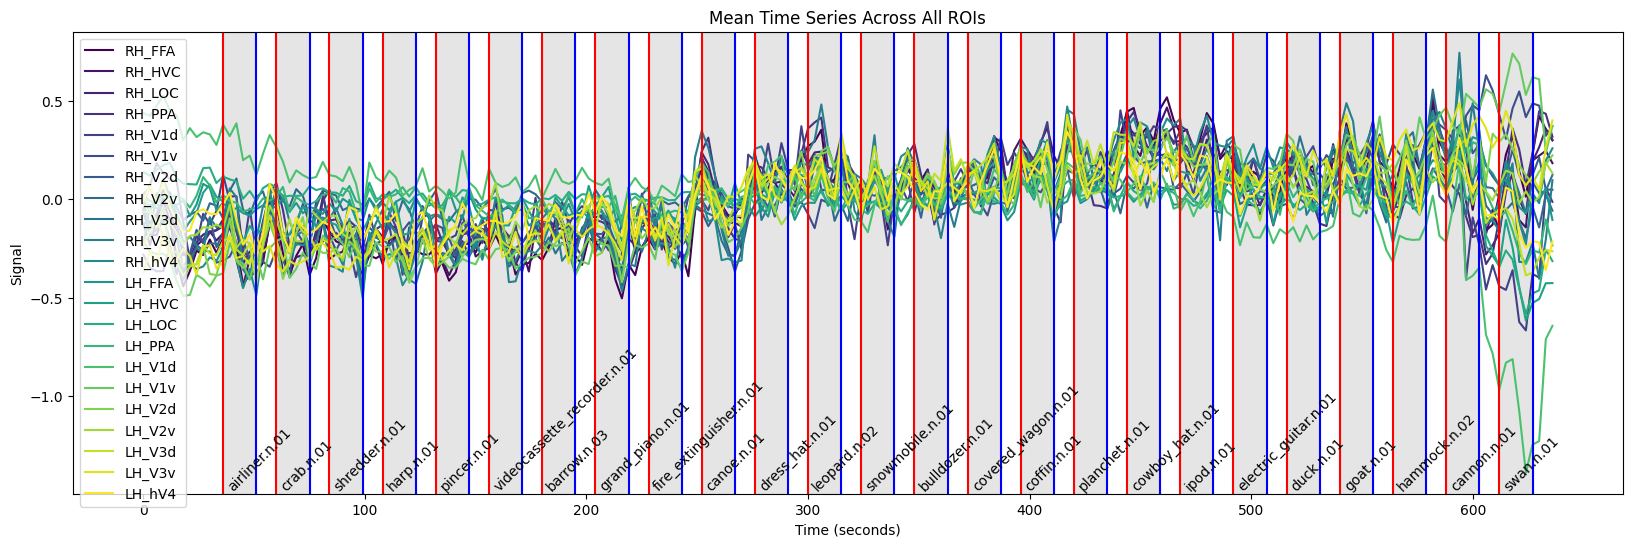

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

time_points = np.arange(0, mean_time_series_array.shape[1] * 3, 3)
plt.figure(figsize=(20, 6))

colors = plt.cm.get_cmap("viridis", len(masker_labels))

for i, mean_time_series in enumerate(mean_time_series_array):
    plt.plot(time_points, mean_time_series, label=masker_labels[i], color=colors(i))

plt.xlabel("Time (seconds)")
plt.ylabel("Signal")
plt.title("Mean Time Series Across All ROIs")

current_onset = 36
interval = 24

for i, label_name in enumerate(unique_labels):
    plt.axvline(x=current_onset, color="r")
    plt.axvline(x=current_onset + 15, color="b")
    plt.axvspan(current_onset, current_onset + 15, color="grey", alpha=0.2)
    plt.text(current_onset + 1, plt.ylim()[0], label_name, rotation = 45, verticalalignment="bottom")
    current_onset += interval

plt.legend()
plt.show()

In [ ]:
label_time_series_dict = {}
start_time = 36
interval_length = 15
break_length = 9
current_time = start_time

for label_index, label_name in enumerate(unique_labels):
    label_time_series_dict[label_name] = {}
    print(f"Processing label: {label_name} (index: {label_index})")

    for roi_index in range(mean_time_series_array.shape[0]):
        roi_name = masker_labels[roi_index]

        start = current_time
        end = start + interval_length

        if end < mean_time_series_array.shape[1]:
            time_series_segment = mean_time_series_array[roi_index, start:end]
            label_time_series_dict[label_name][roi_name] = time_series_segment

    current_time += interval_length
    current_time += break_length
    print(f"Current time after label {label_name}: {current_time}\n")

Processing label: airliner.n.01 (index: 0)
Current time after label airliner.n.01: 60

Processing label: crab.n.01 (index: 1)
Current time after label crab.n.01: 84

Processing label: shredder.n.01 (index: 2)
Current time after label shredder.n.01: 108

Processing label: harp.n.01 (index: 3)
Current time after label harp.n.01: 132

Processing label: pincer.n.01 (index: 4)
Current time after label pincer.n.01: 156

Processing label: videocassette_recorder.n.01 (index: 5)
Current time after label videocassette_recorder.n.01: 180

Processing label: barrow.n.03 (index: 6)
Current time after label barrow.n.03: 204

Processing label: grand_piano.n.01 (index: 7)
Current time after label grand_piano.n.01: 228

Processing label: fire_extinguisher.n.01 (index: 8)
Current time after label fire_extinguisher.n.01: 252

Processing label: canoe.n.01 (index: 9)
Current time after label canoe.n.01: 276

Processing label: dress_hat.n.01 (index: 10)
Current time after label dress_hat.n.01: 300

Processin

In [ ]:
label_time_series_dict

{'airliner.n.01': {'RH_FFA': array([-0.27832332, -0.23169075, -0.18962584, -0.2849915 , -0.36504406,
         -0.2567394 , -0.27874634, -0.28010336, -0.24049538, -0.3259666 ,
         -0.4127534 , -0.37081328, -0.23035434, -0.22341482, -0.2687697 ],
        dtype=float32),
  'RH_HVC': array([-0.3289491 , -0.20735867, -0.18775195, -0.37151352, -0.30606562,
         -0.22617537, -0.19209704, -0.17901413, -0.3762944 , -0.3067226 ,
         -0.3852648 , -0.31104812, -0.15748483, -0.17051142, -0.29003358],
        dtype=float32),
  'RH_LOC': array([-0.19011667, -0.12974006, -0.14518471, -0.27659446, -0.2725501 ,
         -0.27110234, -0.17743066, -0.13206275, -0.1991474 , -0.19293271,
         -0.28892314, -0.25582403, -0.17888139, -0.16797481, -0.20133056],
        dtype=float32),
  'RH_PPA': array([-0.1285891 , -0.10437977, -0.09502354, -0.16302408, -0.29970074,
         -0.26728192, -0.218953  , -0.17370924, -0.12493044, -0.21823029,
         -0.2740216 , -0.29756314, -0.21189156, -0.285

In [ ]:
# import pprint

# # Prints the nicely formatted dictionary
# pprint.pprint(label_time_series_dict)

# # Sets "pretty_dict_str" to the formatted string value
# pretty_dict_str = pprint.pformat(label_time_series_dict)

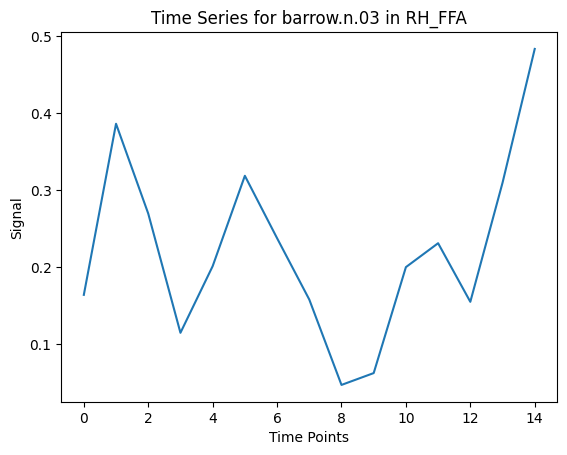

In [ ]:
label_name = "barrow.n.03"
roi_name = "RH_FFA"

if label_name in label_time_series_dict and roi_name in label_time_series_dict[label_name]:
    time_series_data = label_time_series_dict[label_name][roi_name]

    # Plot the time series
    plt.plot(time_series_data)
    plt.xlabel("Time Points")
    plt.ylabel("Signal")
    plt.title(f"Time Series for {label_name} in {roi_name}")
    plt.show()
else:
    print(f'Either "{label_name}" or "{roi_name}" not found in the data.')

In [ ]:
# Should be around 15 seconds
total_seconds = len(time_series_data)
print(f"Total number of seconds: {total_seconds}")

Total number of seconds: 15


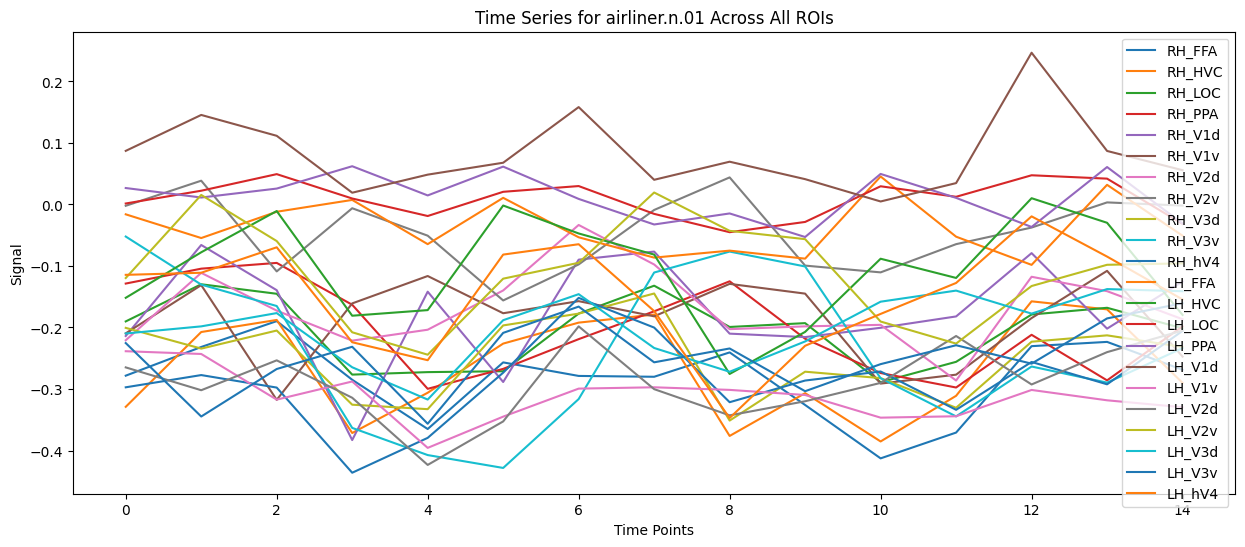

In [ ]:
label_name = "airliner.n.01"

plt.figure(figsize=(15, 6))

for roi_index, roi_name in enumerate(masker_labels):
    if label_name in label_time_series_dict and roi_name in label_time_series_dict[label_name]:
        time_series_data = label_time_series_dict[label_name][roi_name]
        plt.plot(time_series_data, label=roi_name)

plt.xlabel("Time Points")
plt.ylabel("Signal")
plt.title(f"Time Series for {label_name} Across All ROIs")
plt.legend()
plt.show()

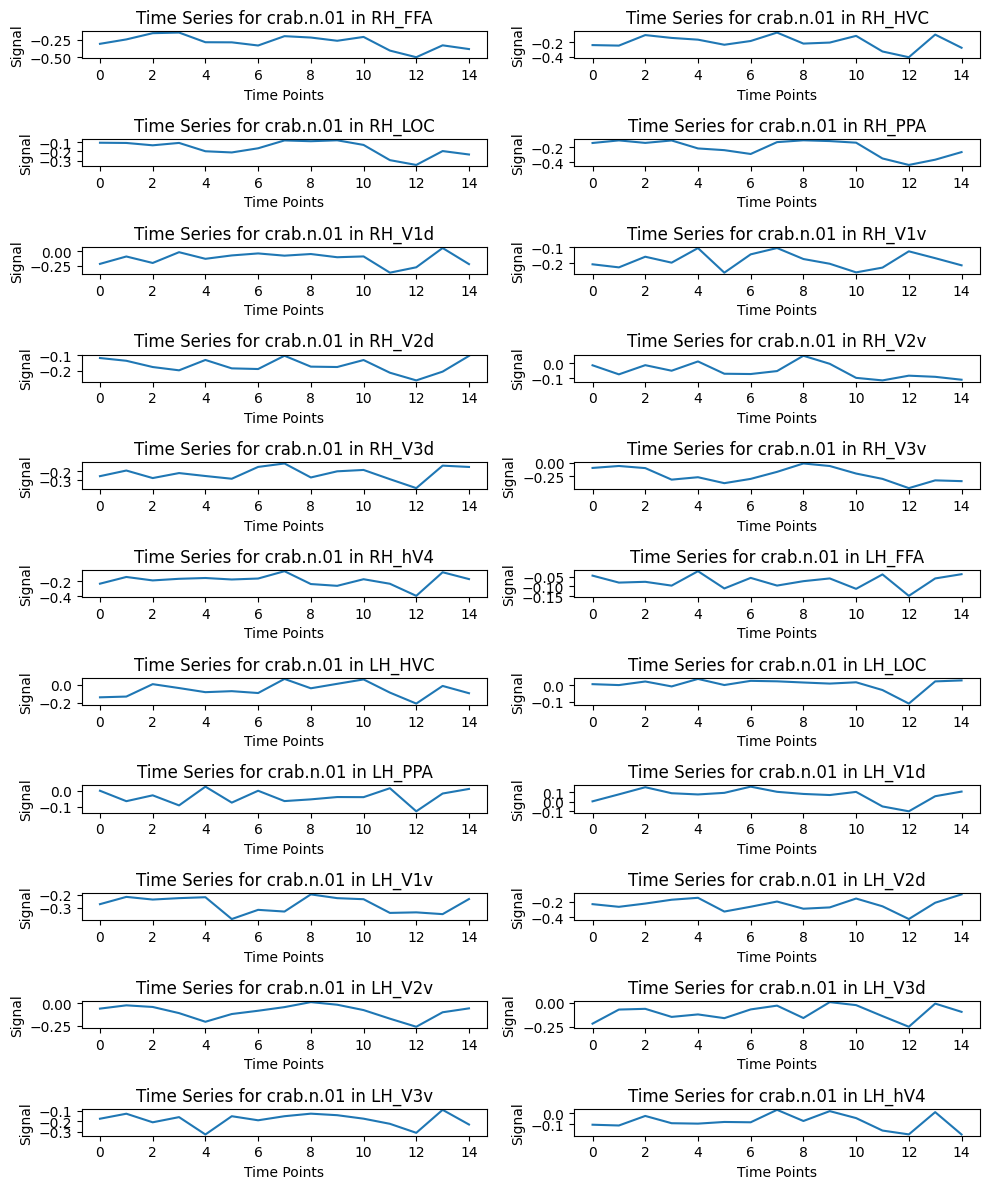

In [ ]:
label_name = "crab.n.01"

plt.figure(figsize=(10, 12))

for roi_index, roi_name in enumerate(masker_labels):
    if label_name in label_time_series_dict and roi_name in label_time_series_dict[label_name]:
        time_series_data = label_time_series_dict[label_name][roi_name]
        plt.subplot(11, 2, roi_index + 1)  # Create a subplot for each ROI
        plt.plot(time_series_data, label=roi_name)
        plt.xlabel("Time Points")
        plt.ylabel("Signal")
        plt.title(f"Time Series for {label_name} in {roi_name}")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
output_dir = "labeled_time_series_plots"

for label_name in unique_labels:
    # Modify label name to remove ".n.01"
    cleaned_label_name = label_name.split(".")[0] if "." in label_name else label_name

    # Create a subdirectory for each label
    label_dir = os.path.join(output_dir, cleaned_label_name)
    os.makedirs(label_dir, exist_ok=True)

    plt.figure(figsize=(10, 13))

    for roi_index, roi_name in enumerate(masker_labels):
        if label_name in label_time_series_dict and roi_name in label_time_series_dict[label_name]:
            time_series_data = label_time_series_dict[label_name][roi_name]
            plt.subplot(11, 2, roi_index + 1)
            plt.plot(time_series_data, label=roi_name)
            plt.xlabel("Time Points")
            plt.ylabel("Signal")
            plt.title(f"Time Series for {label_name} in {roi_name}")

    plt.tight_layout()

    # Save the plots as jpg
    filename = os.path.join(label_dir, f"{cleaned_label_name}_time_series.jpg")
    plt.savefig(filename)
    plt.close()

In [ ]:
# Remove folder for testing lol
# import shutil

# shutil.rmtree("/content/labeled_time_series_plots")

In [ ]:
# TS dependencies
from tensorflow import keras
import numpy as np
import cv2
from glob import glob
import tensorflow as tf

**Dataset Distribution**
- Training: 70%
- Validating: 10%
- Testing: 20%

In [ ]:
# Path to dataset
dataset_path = "/content/labeled_time_series_plots/"
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 64

In [ ]:
# Load the training dataset, 70% training
train_ds = tf.keras.preprocessing.image_dataset_from_directory (
    dataset_path,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)
# Load the validation dataset, 20% validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory (
    dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)

Found 25 files belonging to 25 classes.
Using 18 files for training.
Found 25 files belonging to 25 classes.
Using 7 files for validation.


In [ ]:
# Creating testing dataset
val_batches = int((2/3) * len(val_ds))  # 20% of the original data
test_ds = val_ds.skip(val_batches)  # Skip first 2/3 for test
val_ds = val_ds.take(val_batches)    # Take first 2/3 for validation

In [ ]:
# Use ResNet152V2 as base model
base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3)
)

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
# Get number of image labels
num_labels = len(train_ds.class_names)
num_labels

25

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Create a new model using ResNet152V2 architecture
model = Sequential([
    base_model, #Weight will not change with training
    GlobalAveragePooling2D(),
    Dense(num_labels, activation="softmax")  #categorical output layer
])
# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-3), #Learning rate according to paper
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# # Train model
# epochs = 3
# history  = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

In [ ]:
# # Plot accuracy and loss curves
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

# ax1.plot(history.history["loss"], color="r", label="Train loss")
# ax1.plot(history.history["val_loss"], color="b", label="Validation loss")
# ax1.set_xticks(np.arange(1, epochs, 1))
# legend = ax1.legend(loc="best", shadow=True)

# ax2.plot(history.history["accuracy"], color="r", label="Train accuracy")
# ax2.plot(history.history["val_accuracy"], color="b",label="Validation accuracy")
# ax2.set_xticks(np.arange(1, epochs, 1))
# legend = ax2.legend(loc="best", shadow=True)

# plt.tight_layout()
# plt.show()

In [ ]:
# test_loss, test_accuracy = model.evaluate(test_ds)

In [ ]:
# print(f"Test accuracy: {test_accuracy}")
# print(f"Test loss: {test_loss}")

In [ ]:
# # Save the model
# model.save("fMRI_image_classification.keras")

In [ ]:
# model.summary()